Instalación e importación de librerías

In [2]:
print("fg")

fg


In [ ]:
!pip install tensorflow==2.1.0
!pip install opencv-python
!pip install matplotlib
!pip install pillow

In [1]:
import os
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.1.0


Carga de DATA

In [2]:
dir_entreno = 'C:/Users/PAUL/Desktop/jupyter/data/'
dir_entreno_mas = os.path.join(dir_entreno, 'with_mask')
dir_entreno_no_mas = os.path.join(dir_entreno, 'without_mask')

In [3]:
entreno_masc_fnames = os.listdir( dir_entreno_mas )
entreno_no_masc_fnames = os.listdir( dir_entreno_no_mas )
print(entreno_masc_fnames[:10])
print(entreno_no_masc_fnames[:10])

['0-with-mask.jpg', '1-with-mask.jpg', '10-with-mask.jpg', '100-with-mask.jpg', '101-with-mask.jpg', '103-with-mask.jpg', '104-with-mask.jpg', '105-with-mask.jpg', '106-with-mask.jpg', '107-with-mask.jpg']
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


In [4]:
print('Total imagenes con mascara: ', len(os.listdir( dir_entreno_mas ) ))
print('Total imagenes sin mascara: ', len(os.listdir( dir_entreno_no_mas ) ))

Total imagenes con mascara:  700
Total imagenes sin mascara:  696


Se genera un modelo con 3 capas de convolución

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    #clasifica si hay o no
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001),
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_height = 150
img_width = 150
batch_size = 10
train_datagen = ImageDataGenerator(rescale = 1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
            dir_entreno,
            target_size=(img_height, img_width),
            batch_size=batch_size,
            class_mode='binary',
            subset='training'
)

validation_generator = train_datagen.flow_from_directory(
            dir_entreno,
            target_size=(img_height, img_width),
            batch_size=batch_size,
            class_mode='binary',
            subset='validation'
)

Found 1117 images belonging to 2 classes.
Found 279 images belonging to 2 classes.


In [8]:
nb_epochs = 10
history = model.fit_generator(
                    train_generator,
                    steps_per_epoch = train_generator.samples // batch_size,
                    validation_data = validation_generator,
                    validation_steps = validation_generator.samples // batch_size,
                    epochs = nb_epochs
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 111 steps, validate for 27 steps
Epoch 1/10
111/111 [==============================] - 103s 928ms/step - loss: 0.5071 - accuracy: 0.7877 - val_loss: 0.3159 - val_accuracy: 0.8667
Epoch 2/10
111/111 [==============================] - 55s 493ms/step - loss: 0.1967 - accuracy: 0.9350 - val_loss: 0.1570 - val_accuracy: 0.9444
Epoch 3/10
111/111 [==============================] - 52s 469ms/step - loss: 0.1670 - accuracy: 0.9386 - val_loss: 0.2324 - val_accuracy: 0.9593
Epoch 4/10
111/111 [==============================] - 51s 457ms/step - loss: 0.1187 - accuracy: 0.9648 - val_loss: 0.1099 - val_accuracy: 0.9667
Epoch 5/10
111/111 [==============================] - 78s 702ms/step - loss: 0.0898 - accuracy: 0.9756 - val_loss: 0.0752 - val_accuracy: 0.9815
Epoch 6/10
111/111 [==============================] - 81s 729ms/step - loss: 0.0669 - accuracy: 0.9774 - 

In [9]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np

No Lleva mascara


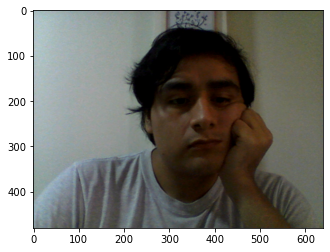

No Lleva mascara


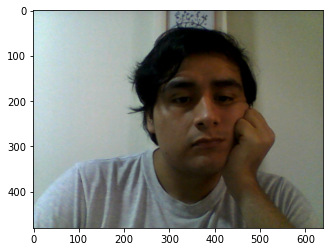

No Lleva mascara


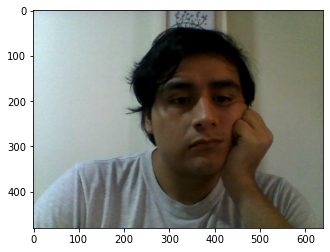

No Lleva mascara


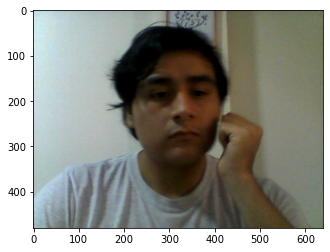

No Lleva mascara


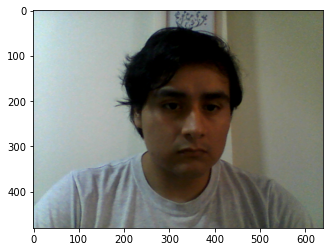

No Lleva mascara


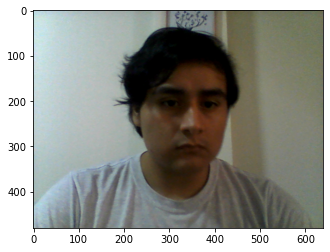

No Lleva mascara


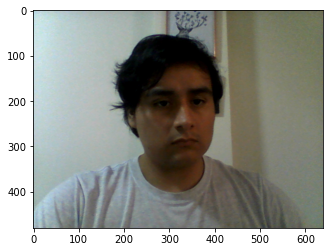

No Lleva mascara


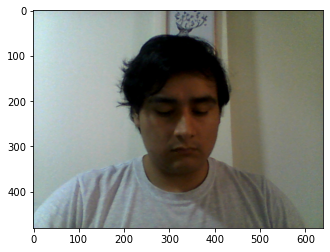

No Lleva mascara


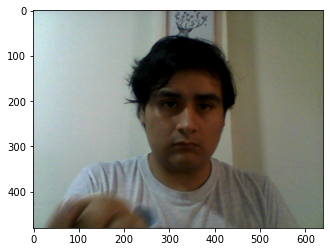

No Lleva mascara


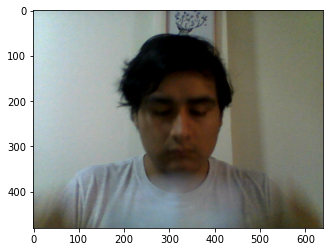

Sí lleva mascara


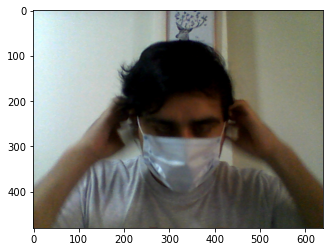

Sí lleva mascara


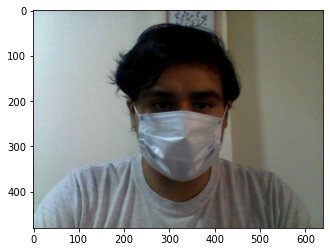

Sí lleva mascara


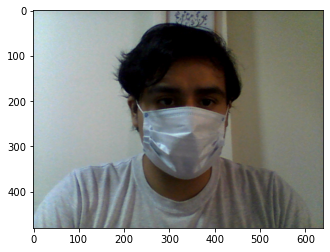

Sí lleva mascara


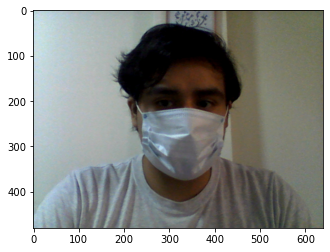

Sí lleva mascara


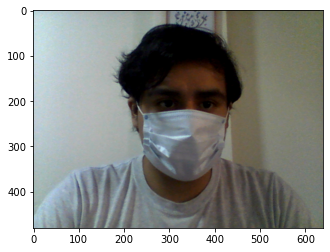

Sí lleva mascara


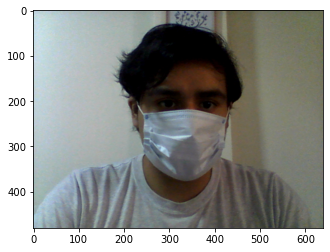

Sí lleva mascara


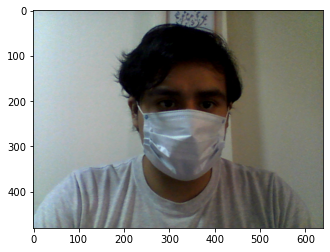

Sí lleva mascara


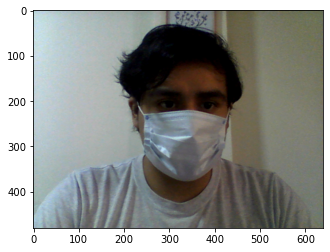

Sí lleva mascara


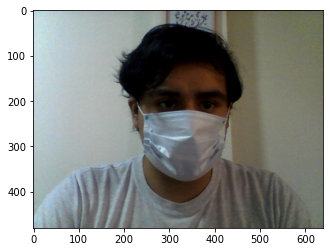

Sí lleva mascara


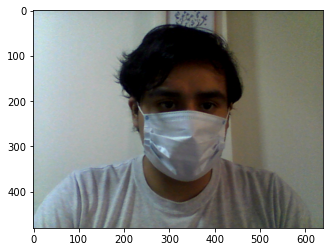

Sí lleva mascara


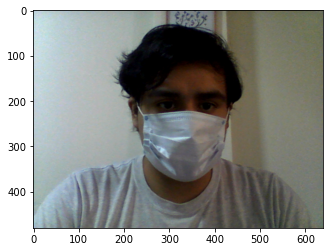

Sí lleva mascara


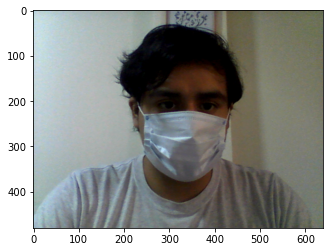

Sí lleva mascara


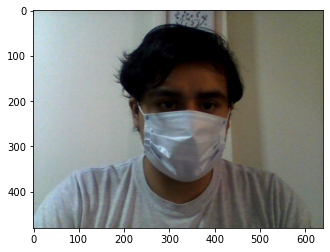

Sí lleva mascara


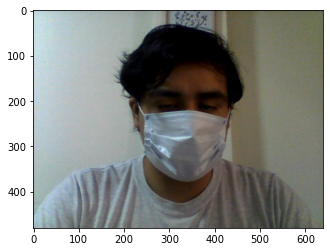

Sí lleva mascara


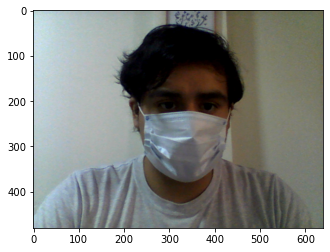

Sí lleva mascara


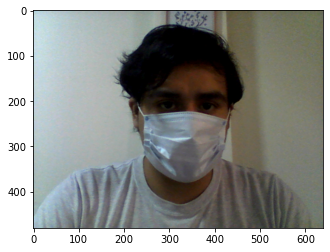

Sí lleva mascara


error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-2b5g8ysb\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [10]:
vc = cv2.VideoCapture(0)
plt.ion()
if vc.isOpened(): 
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

while is_capturing:
    try:    
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    
        frame_res = cv2.resize(frame, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
        x=image.img_to_array(frame_res)
        x=np.expand_dims(x, axis=0)
        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        if classes[0]>0:
            print("No Lleva mascara")
        else:
            print("Sí lleva mascara")
        webcam_preview = plt.imshow(frame)
        try:    
            plt.pause(1)
        except Exception:
            pass
    except KeyboardInterrupt:
        vc.release()

convertir el modelo a una versión liguera TFLite

In [11]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [12]:
open("mask_classifier.tflite","wb").write(tflite_model)

37981176